In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class PositionalEncoding(nn.Module):
    def __init__(self, embedding_size, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, embedding_size)) 
        
        numerator = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1) # 定义分子 - 转变为(max_len, 1)
        denominator = torch.pow(10000, torch.arange(0, embedding_size, 2, dtype=torch.float32) / embedding_size) # 定义分母 - 输出维度为(1, embedding_size/2)
        fraction = numerator / denominator # 输出维度(max_len, embedding_size/2)
        
        self.P[:, :, 0::2] = torch.sin(fraction) # 0::2 表示从索引 0 开始，每隔两个元素选择一个元素
        self.P[:, :, 1::2] = torch.cos(fraction) # 1::2 表示从索引 1 开始，每隔两个元素选择一个元素。

    def forward(self, X):
        # 输入维度为：(1, seq_size, embedding_size)
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        X = self.dropout(X)
        return X

In [4]:
def calculate_cosine_similarity(matrix):
    normalized_matrix = F.normalize(matrix, p=2, dim=2)
    similarity_matrix = torch.bmm(normalized_matrix, normalized_matrix.transpose(1, 2))
    return similarity_matrix

In [38]:
def plot_heatmap(similarity_matrix, title):
    sns.set()
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(similarity_matrix.squeeze().cpu().detach().numpy(), cmap='viridis', annot=True, fmt=".2f")
    plt.title(title)
    plt.xlabel("Token Index")
    plt.ylabel("Token Index")
    plt.show()

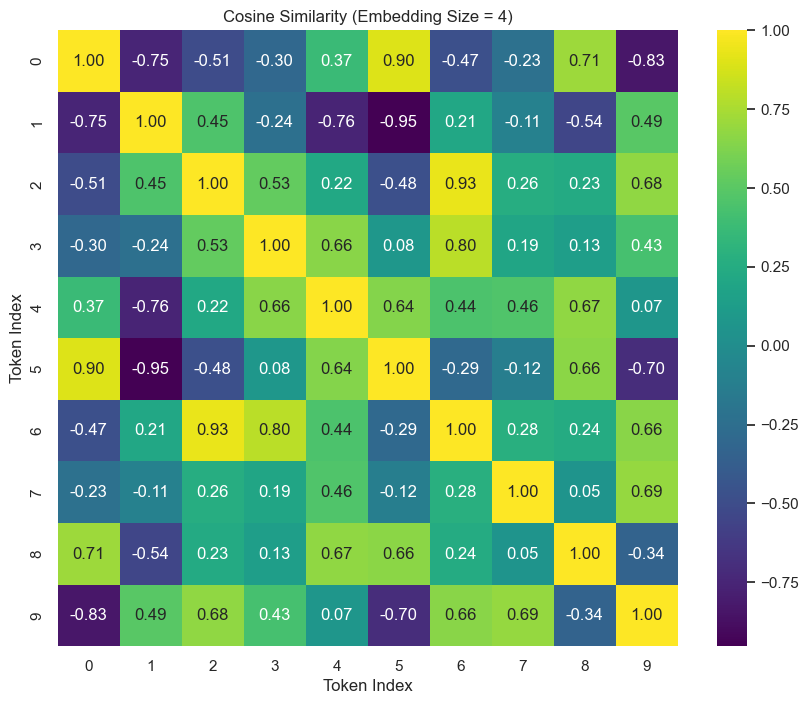

In [69]:
# 参数设定
n = 10  # 词元个数
d = 4  # 嵌入层维度
dropout = 0.1

# 初始化输入矩阵
input_matrix = torch.randn((1, n, d))

# 初始化位置编码
pos_encoding = PositionalEncoding(embedding_size=d, dropout=dropout)
encoded_input = pos_encoding(input_matrix)

# 计算词元之间的余弦相似度
cosine_similarity_matrix = calculate_cosine_similarity(encoded_input)

# 可视化余弦相似度矩阵
plot_heatmap(cosine_similarity_matrix, "Cosine Similarity (Embedding Size = 4)")

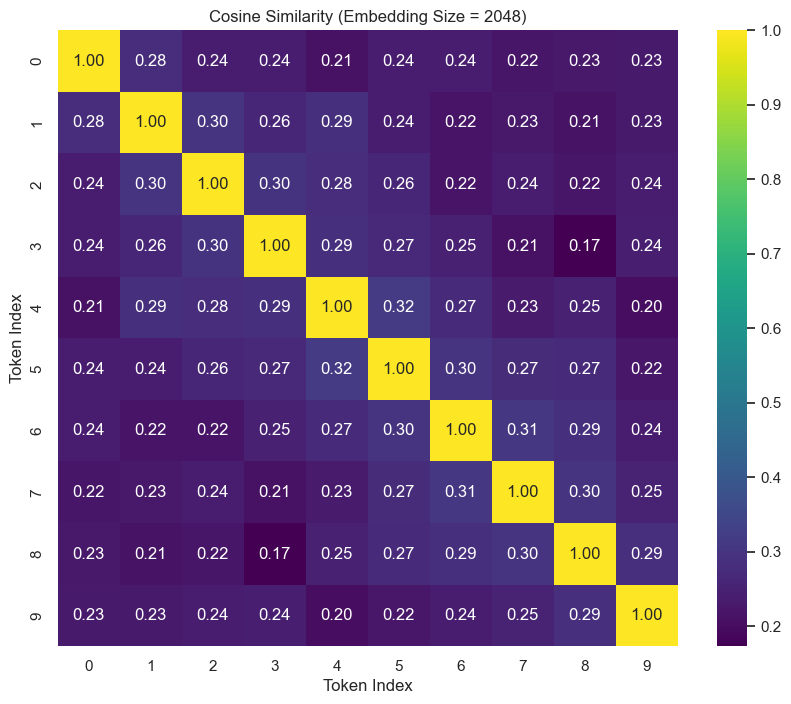

In [70]:
# 参数设定
n = 10  # 词元个数
d = 2048 # 嵌入层维度
dropout = 0.1

# 初始化输入矩阵
input_matrix = torch.randn((1, n, d))

# 初始化位置编码
pos_encoding = PositionalEncoding(embedding_size=d, dropout=dropout)
encoded_input = pos_encoding(input_matrix)

# 计算词元之间的余弦相似度
cosine_similarity_matrix = calculate_cosine_similarity(encoded_input)

# 可视化余弦相似度矩阵
plot_heatmap(cosine_similarity_matrix, "Cosine Similarity (Embedding Size = 2048)")